In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ranksums, ttest_ind

In [2]:
sns.set(style = 'whitegrid')

In [3]:
df = pd.read_excel('11658_2022_316_MOESM2_ESM.xlsx', )

In [4]:
df.head()

,Gene ID,Gene Symbol,Type,control1 Read Count,control2 Read Count,control3 Read Count,control4 Read Count,model1 Read Count,model2 Read Count,model3 Read Count,model4 Read Count,model Average Read Count,control Average Read Count,log2 (model/control),Pvalue(control-vs-model),Qvalue (control-vs-model)
0,258300,Olfr1449,mRNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74277,Chic2,mRNA,773.63,740.03,759.78,799.81,675.27,762.6,751.19,736.69,731.4375,768.3125,-0.125574,0.000750,0.003355
2,104183,Chil4,mRNA,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.2500,0.0000,NaN,NaN,NaN
3,67836,Wdr83,mRNA,176.00,160.00,146.00,149.00,157.00,194.0,169.00,120.00,160.0000,157.7500,-0.034184,0.672733,0.819578
4,432552,Fam71b,mRNA,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00,0.0000,0.2500,NaN,NaN,NaN


In [5]:
df.isna()

,Gene ID,Gene Symbol,Type,control1 Read Count,control2 Read Count,control3 Read Count,control4 Read Count,model1 Read Count,model2 Read Count,model3 Read Count,model4 Read Count,model Average Read Count,control Average Read Count,log2 (model/control),Pvalue(control-vs-model),Qvalue (control-vs-model)
0,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22894,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.describe()

,control1 Read Count,control2 Read Count,control3 Read Count,control4 Read Count,model1 Read Count,model2 Read Count,model3 Read Count,model4 Read Count,model Average Read Count,control Average Read Count,log2 (model/control),Pvalue(control-vs-model),Qvalue (control-vs-model)
count,18802.000000,18802.000000,18802.000000,18802.000000,18802.000000,18802.000000,18802.000000,18802.000000,18802.000000,18802.000000,18013.000000,18013.000000,18013.000000
mean,1482.368456,1506.210951,1419.747133,1498.867923,1547.296388,1585.237301,1547.737886,1527.083616,1551.838798,1476.798616,-0.067973,0.215234,0.290293
std,4465.061770,4491.571305,4291.012564,4613.903461,5013.688269,4999.441450,4841.821196,4823.279166,4912.866715,4457.377686,0.512654,0.298222,0.343900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.020169,0.000000,0.000000
25%,34.000000,35.000000,34.000000,37.000000,31.000000,36.000000,33.002500,34.000000,34.252500,35.500000,-0.180648,0.000004,0.000029
50%,404.000000,412.470000,388.000000,406.000000,385.000000,405.935000,395.000000,398.000000,397.000000,402.278750,-0.048197,0.036651,0.102565
75%,1449.000000,1469.000000,1390.000000,1444.750000,1445.060000,1492.920000,1453.817500,1442.135000,1458.658125,1439.400625,0.077229,0.375743,0.581887
max,263205.000000,249045.000000,246942.000000,290216.000000,327618.000000,311265.000000,281758.000000,305843.000000,306621.000000,262352.000000,9.828537,0.999683,1.000000


In [7]:
df_fgf13 = df[df['Gene Symbol'] == 'Fgf13'].iloc[:,0:11]
df_fgf13

,Gene ID,Gene Symbol,Type,control1 Read Count,control2 Read Count,control3 Read Count,control4 Read Count,model1 Read Count,model2 Read Count,model3 Read Count,model4 Read Count
9375,14168,Fgf13,mRNA,9329.95,9701.99,9195.31,9785.67,11746.37,11414.96,11579.83,10687.66


In [8]:
df_fgf13 = df_fgf13.melt(id_vars=['Gene ID','Gene Symbol', 'Type'], var_name='Subject', value_name='Read Count')
df_fgf13

,Gene ID,Gene Symbol,Type,Subject,Read Count
0,14168,Fgf13,mRNA,control1 Read Count,9329.95
1,14168,Fgf13,mRNA,control2 Read Count,9701.99
2,14168,Fgf13,mRNA,control3 Read Count,9195.31
3,14168,Fgf13,mRNA,control4 Read Count,9785.67
4,14168,Fgf13,mRNA,model1 Read Count,11746.37
5,14168,Fgf13,mRNA,model2 Read Count,11414.96
6,14168,Fgf13,mRNA,model3 Read Count,11579.83
7,14168,Fgf13,mRNA,model4 Read Count,10687.66


In [9]:
df_fgf13['Control'] = df_fgf13['Subject'].apply(lambda x: True if 'control' in x else False)
df_fgf13

,Gene ID,Gene Symbol,Type,Subject,Read Count,Control
0,14168,Fgf13,mRNA,control1 Read Count,9329.95,True
1,14168,Fgf13,mRNA,control2 Read Count,9701.99,True
2,14168,Fgf13,mRNA,control3 Read Count,9195.31,True
3,14168,Fgf13,mRNA,control4 Read Count,9785.67,True
4,14168,Fgf13,mRNA,model1 Read Count,11746.37,False
5,14168,Fgf13,mRNA,model2 Read Count,11414.96,False
6,14168,Fgf13,mRNA,model3 Read Count,11579.83,False
7,14168,Fgf13,mRNA,model4 Read Count,10687.66,False


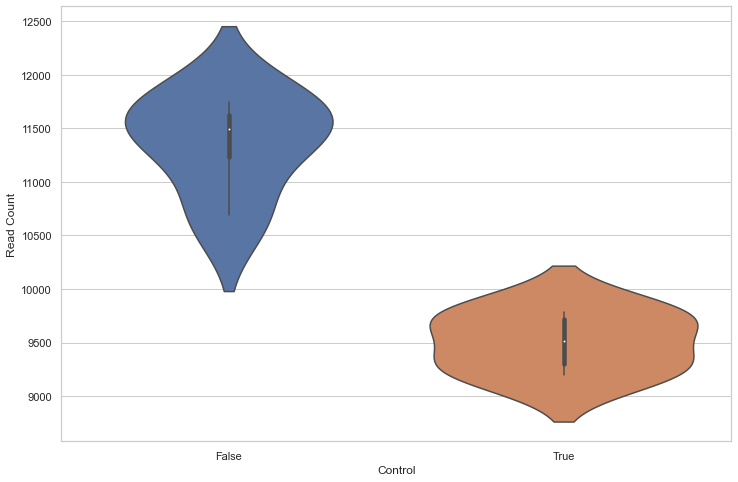

In [10]:
fig1 = plt.figure(figsize=(12,8))
ax = sns.violinplot(data=df_fgf13, x='Control', y='Read Count')
ax.set_xlabel('Control')

#fig100.savefig(os.path.join(data_path,"violinplot-tissue.svg"), format='svg', facecolor='w')

plt.show()

In [11]:
a = df_fgf13[df_fgf13['Control'] == True]['Read Count']
b = df_fgf13[df_fgf13['Control'] == False]['Read Count']

a = a.dropna()
b = b.dropna()

print(f'P-value: {ttest_ind(a,b).pvalue:.2e}')

P-value: 5.03e-04


### For the second gene: Scn9a

In [21]:
df_scn9a = df[df['Gene Symbol'] == 'Scn9a'].iloc[:,:11]

In [22]:
df_scn9a = df_scn9a.melt(id_vars=['Gene ID','Gene Symbol', 'Type'], var_name='Subject', value_name='Read Count')
df_scn9a

,Gene ID,Gene Symbol,Type,Subject,Read Count
0,20274,Scn9a,mRNA,control1 Read Count,16823.49
1,20274,Scn9a,mRNA,control2 Read Count,18161.24
2,20274,Scn9a,mRNA,control3 Read Count,18022.55
3,20274,Scn9a,mRNA,control4 Read Count,18095.49
4,20274,Scn9a,mRNA,model1 Read Count,21004.28
5,20274,Scn9a,mRNA,model2 Read Count,20244.48
6,20274,Scn9a,mRNA,model3 Read Count,20048.03
7,20274,Scn9a,mRNA,model4 Read Count,19556.60


In [23]:
df_scn9a['Control'] = df_scn9a['Subject'].apply(lambda x: True if 'control' in x else False)
df_scn9a

,Gene ID,Gene Symbol,Type,Subject,Read Count,Control
0,20274,Scn9a,mRNA,control1 Read Count,16823.49,True
1,20274,Scn9a,mRNA,control2 Read Count,18161.24,True
2,20274,Scn9a,mRNA,control3 Read Count,18022.55,True
3,20274,Scn9a,mRNA,control4 Read Count,18095.49,True
4,20274,Scn9a,mRNA,model1 Read Count,21004.28,False
5,20274,Scn9a,mRNA,model2 Read Count,20244.48,False
6,20274,Scn9a,mRNA,model3 Read Count,20048.03,False
7,20274,Scn9a,mRNA,model4 Read Count,19556.60,False


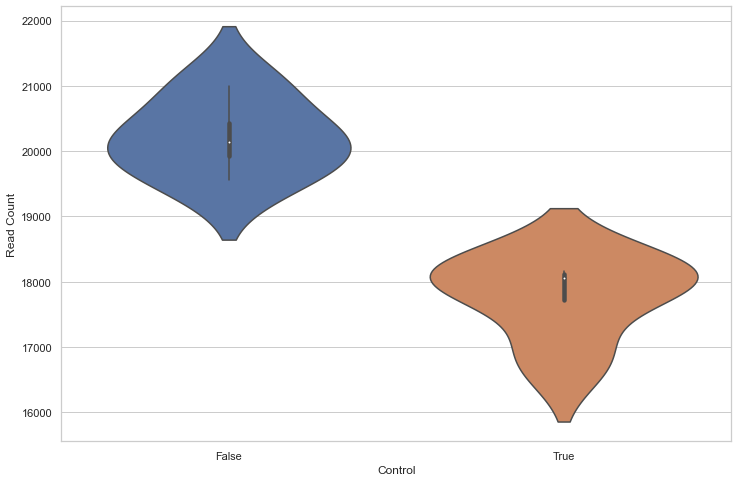

In [24]:
fig2 = plt.figure(figsize=(12,8))
ax = sns.violinplot(data=df_scn9a, x='Control', y='Read Count')
ax.set_xlabel('Control')

#fig100.savefig(os.path.join(data_path,"violinplot-tissue.svg"), format='svg', facecolor='w')

plt.show()

In [25]:
a = df_scn9a[df_scn9a['Control'] == True]['Read Count']
b = df_scn9a[df_scn9a['Control'] == False]['Read Count']

a = a.dropna()
b = b.dropna()

print(f'P-value: {ttest_ind(a,b).pvalue:.2e}')

P-value: 1.43e-03
